# **Problem Statment**
More insights on fluctuating price of bitcoin. Prediction on future prices.

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/Bitcoin/BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-27,453.520996,478.148987,453.520996,473.463989,473.463989,1.647810e+08
1,2016-05-28,473.028992,533.473022,472.699005,530.039978,530.039978,1.811990e+08
2,2016-05-29,527.476990,553.960022,512.179016,526.232971,526.232971,1.487370e+08
3,2016-05-30,528.471008,544.348999,522.963013,533.864014,533.864014,8.795870e+07
4,2016-05-31,534.190979,546.617981,520.661987,531.385986,531.385986,1.384500e+08
...,...,...,...,...,...,...,...
1822,2021-05-23,37531.449219,38289.218750,31227.339844,34770.582031,34770.582031,7.846927e+10
1823,2021-05-24,34700.363281,39835.140625,34551.082031,38705.980469,38705.980469,6.735958e+10
1824,2021-05-25,38795.781250,39776.351563,36581.429688,38402.222656,38402.222656,5.621192e+10
1825,2021-05-26,38392.625000,40782.078125,37905.835938,39294.199219,39294.199219,5.134674e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1823 non-null   float64
 2   High       1823 non-null   float64
 3   Low        1823 non-null   float64
 4   Close      1823 non-null   float64
 5   Adj Close  1823 non-null   float64
 6   Volume     1823 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1.823000e+03
mean,9957.992312,10242.684991,9646.608472,9977.818016,9977.818016,1.675324e+10
std,12455.473206,12851.088938,11987.838007,12469.937413,12469.937413,2.118747e+10
min,453.520996,478.148987,453.520996,473.463989,473.463989,3.397780e+07
25%,3468.980957,3517.286622,3407.150635,3473.282593,3473.282593,1.705305e+09
50%,7202.551270,7357.020020,7029.289063,7204.771484,7204.771484,7.739500e+09
75%,10139.415527,10344.151856,9780.991699,10143.276367,10143.276367,2.411586e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50d2464e50>,
      dtype=object)

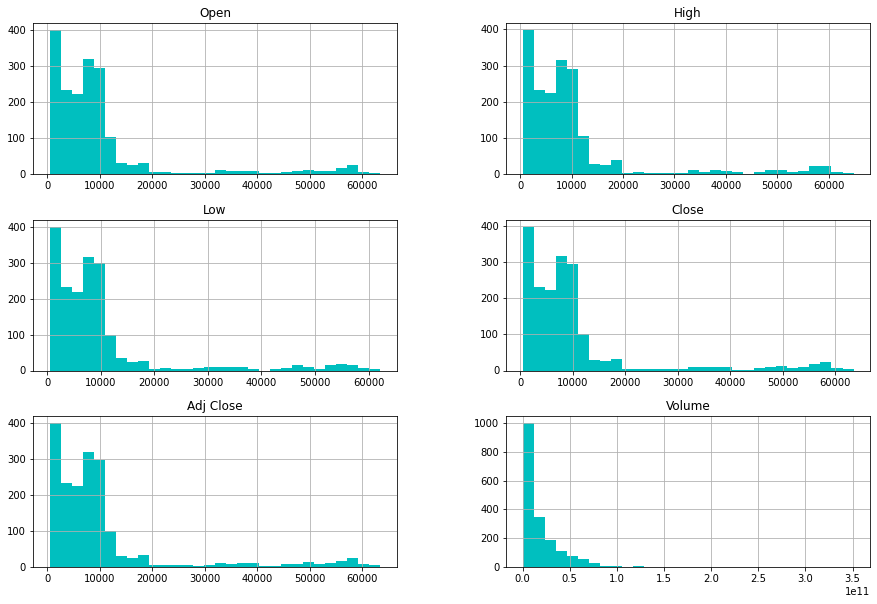

In [7]:
df.hist(bins=30, figsize=(15,10), color='c')

In [8]:
df.loc[df['Open'].isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
1421,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN
1596,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
1599,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN
1600,2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.dropna(axis=0, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1823 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1823 non-null   datetime64[ns]
 1   Open       1823 non-null   float64       
 2   High       1823 non-null   float64       
 3   Low        1823 non-null   float64       
 4   Close      1823 non-null   float64       
 5   Adj Close  1823 non-null   float64       
 6   Volume     1823 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 113.9 KB


# EDA

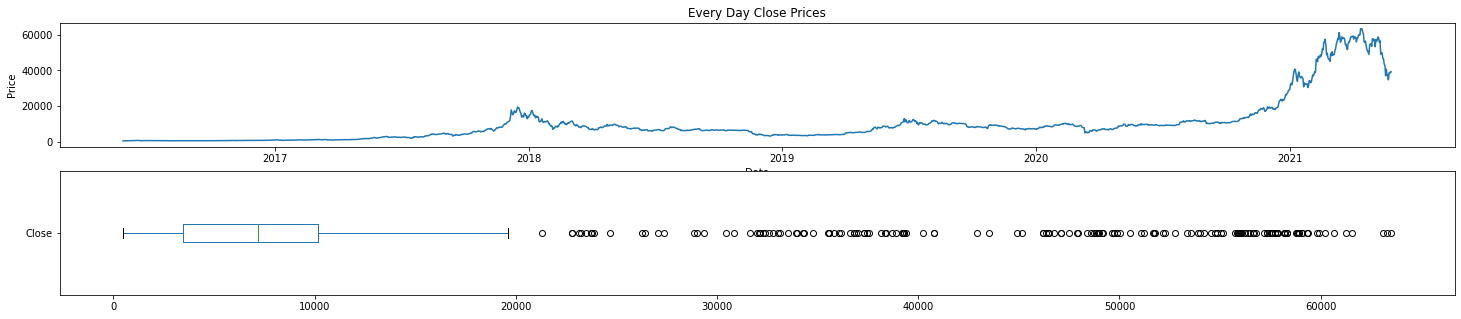

In [16]:
plt.figure(figsize=(25,5))
plt.subplot(211)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Every Day Close Prices')
plt.subplot(212)
df['Close'].plot(kind='box', vert=False)

In [12]:
df.loc[df['Date']=='2020-01-01']

,Date,Open,High,Low,Close,Adj Close,Volume
1314,2020-01-01,7194.89209,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10


In [13]:
df['Date'][1314:]

1314   2020-01-01
1315   2020-01-02
1316   2020-01-03
1317   2020-01-04
1318   2020-01-05
          ...    
1822   2021-05-23
1823   2021-05-24
1824   2021-05-25
1825   2021-05-26
1826   2021-05-27
Name: Date, Length: 509, dtype: datetime64[ns]

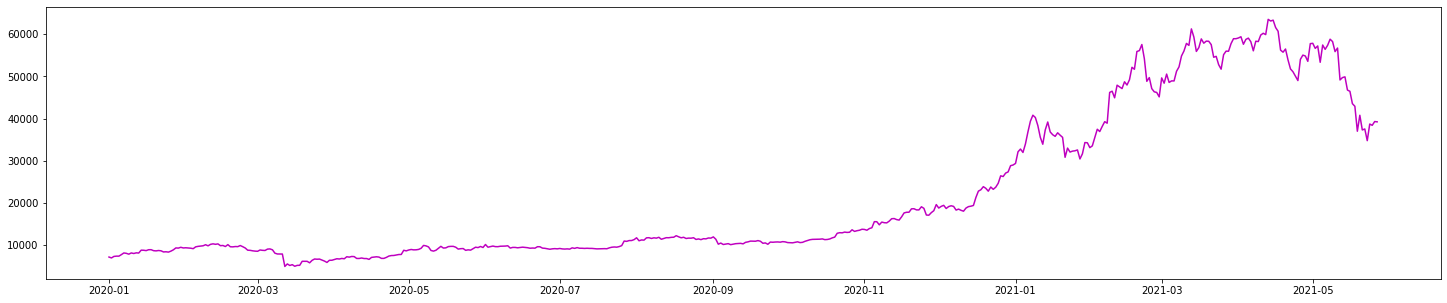

In [14]:
plt.figure(figsize=(25,5))
plt.plot(df['Date'][1314:], df['Close'][1314:], 'm')

In [17]:
df2 = df.iloc[1314:,:].copy()
df2

,Date,Open,High,Low,Close,Adj Close,Volume
1314,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10
1315,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10
1316,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
1317,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
1318,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10
...,...,...,...,...,...,...,...
1822,2021-05-23,37531.449219,38289.218750,31227.339844,34770.582031,34770.582031,7.846927e+10
1823,2021-05-24,34700.363281,39835.140625,34551.082031,38705.980469,38705.980469,6.735958e+10
1824,2021-05-25,38795.781250,39776.351563,36581.429688,38402.222656,38402.222656,5.621192e+10
1825,2021-05-26,38392.625000,40782.078125,37905.835938,39294.199219,39294.199219,5.134674e+10


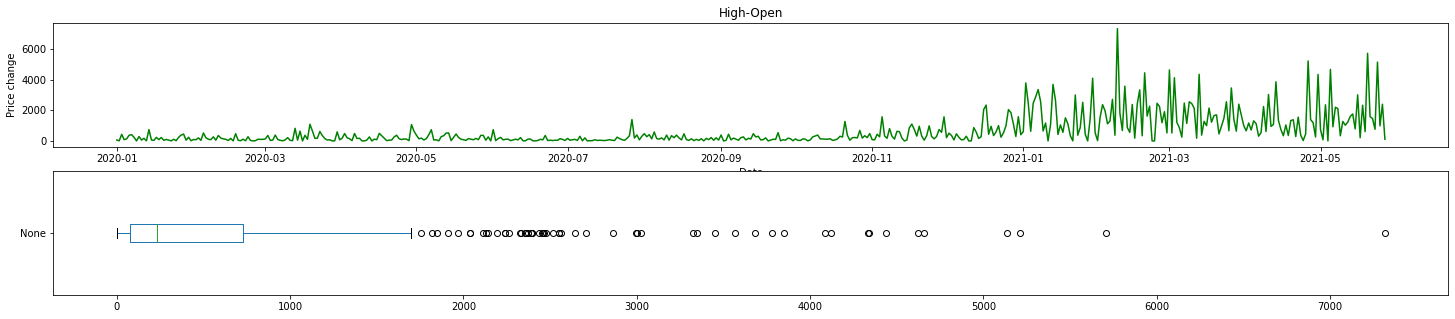

In [18]:
plt.figure(figsize=(25,5))
plt.subplot(211)
plt.plot(df2['Date'], df2['High']-df2['Open'], 'g')
plt.xlabel('Date')
plt.ylabel('Price change')
plt.title('High-Open')
plt.subplot(212)
(df2['High']-df2['Open']).plot(kind='box', vert=False)

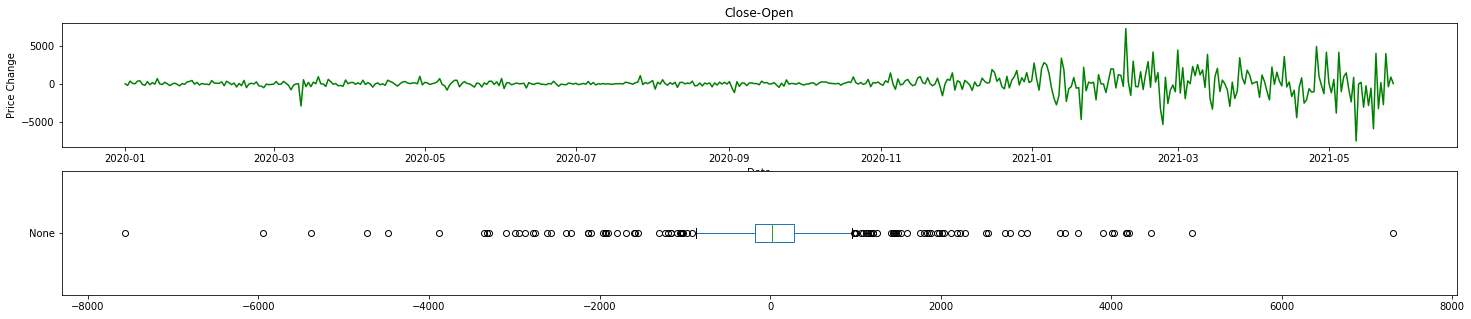

In [19]:
plt.figure(figsize=(25,5))
plt.subplot(211)
plt.plot(df2['Date'], (df2['Close']-df2['Open']), 'g')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.title('Close-Open')
plt.subplot(212)
(df2['Close']-df2['Open']).plot(kind='box', vert=False)

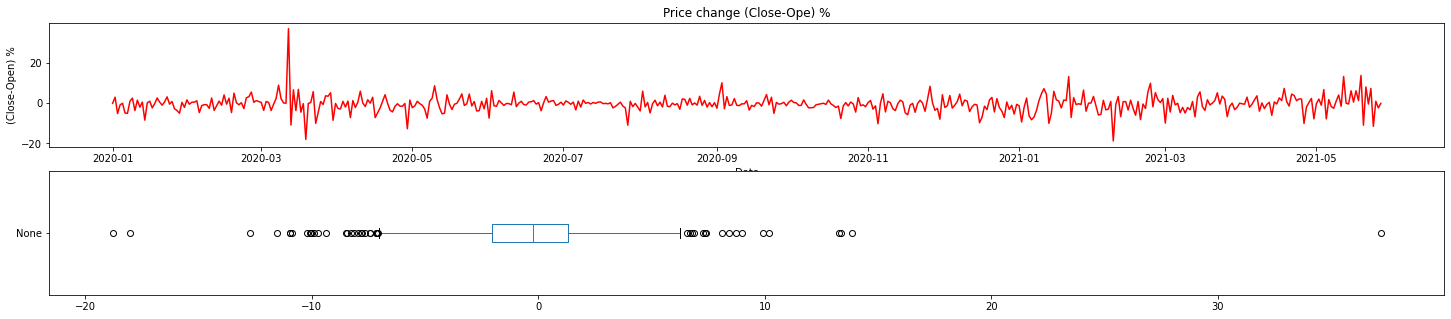

In [20]:
plt.figure(figsize=(25,5))
plt.subplot(211)
plt.plot(df2['Date'], (100-(df2['Close']/df2['Open'])*100), 'r')
plt.xlabel('Date')
plt.ylabel('(Close-Open) %')
plt.title('Price change (Close-Ope) %')
plt.subplot(212)
(100-(df2['Close']/df2['Open'])*100).plot(kind='box', vert=False)

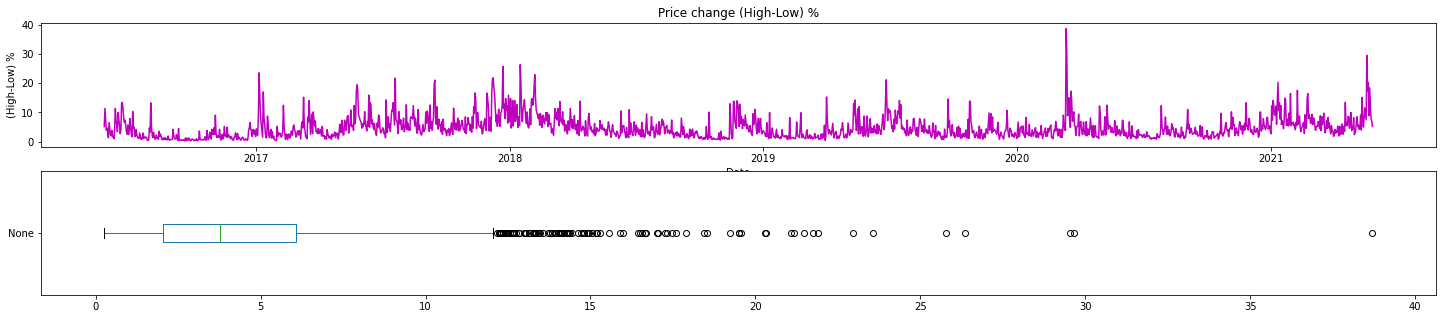

In [21]:
plt.figure(figsize=(25,5))
plt.subplot(211)
plt.plot(df['Date'], (100-(df['Low']/df['High'])*100), 'm')
plt.xlabel('Date')
plt.ylabel('(High-Low) %')
plt.title('Price change (High-Low) %')
plt.subplot(212)
(100-(df['Low']/df['High'])*100).plot(kind='box', vert=False)

# **Forecasting using Facebook Prophet**

In [22]:
df2

,Date,Open,High,Low,Close,Adj Close,Volume
1314,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10
1315,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10
1316,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
1317,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
1318,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10
...,...,...,...,...,...,...,...
1822,2021-05-23,37531.449219,38289.218750,31227.339844,34770.582031,34770.582031,7.846927e+10
1823,2021-05-24,34700.363281,39835.140625,34551.082031,38705.980469,38705.980469,6.735958e+10
1824,2021-05-25,38795.781250,39776.351563,36581.429688,38402.222656,38402.222656,5.621192e+10
1825,2021-05-26,38392.625000,40782.078125,37905.835938,39294.199219,39294.199219,5.134674e+10


In [23]:
df2.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [24]:
df2.rename({'Date': 'ds', 'Close': 'y'}, axis=1, inplace=True)
df2

,ds,y
1314,2020-01-01,7200.174316
1315,2020-01-02,6985.470215
1316,2020-01-03,7344.884277
1317,2020-01-04,7410.656738
1318,2020-01-05,7411.317383
...,...,...
1822,2021-05-23,34770.582031
1823,2021-05-24,38705.980469
1824,2021-05-25,38402.222656
1825,2021-05-26,39294.199219


In [25]:
m = Prophet(daily_seasonality=True) 
m.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


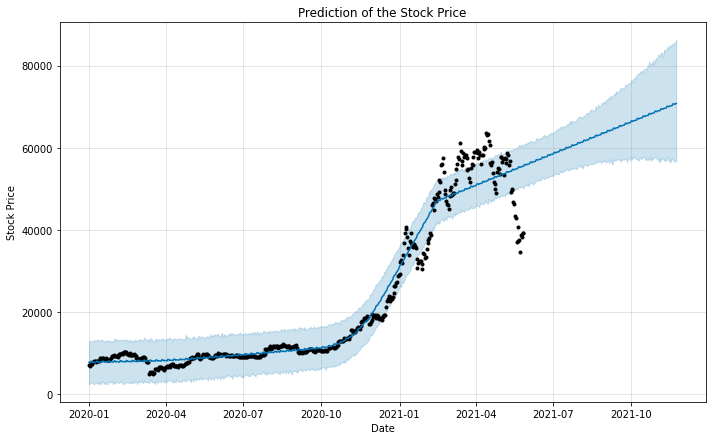

In [26]:
future = m.make_future_dataframe(periods=180) 
prediction = m.predict(future)
m.plot(prediction)

plt.title("Prediction of the Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

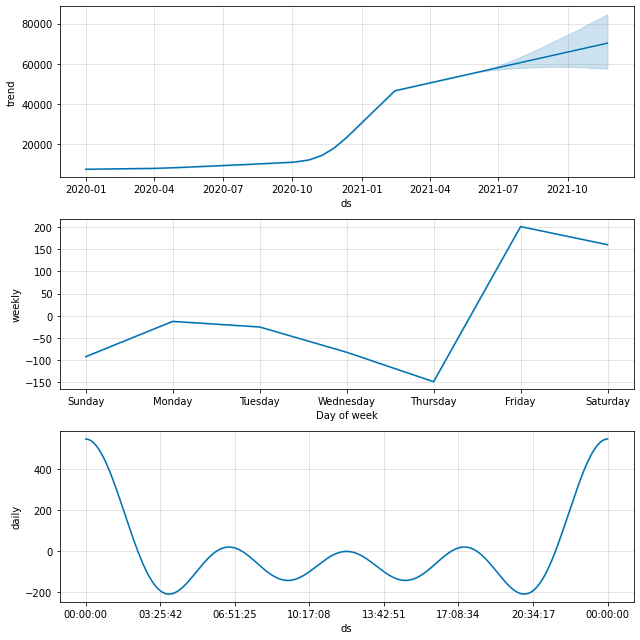

In [27]:
m.plot_components(prediction)
plt.show()